In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

from config import weather_api_key
# Import the time module.
import time
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [2]:
#generate the latitudes and longitudes using the random() 
#use np.random.uniform( low, high, size = )

#use the zip() function to conjoin them as pairs 

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


#the output is a zip object in memory 
# zip object packs each lats and longs in pairs. it will hold the iterator object 
# and produce a tuples in the form of (x,y) 


In [3]:
# #unpack lat_longs zip object into a list 
# #define the list as coordinates 
# coordinates = list(lat_longs)

In [4]:
#generate random world cities 
#use the coordinates in our lat_longs tuple to find the nearest city using 
# need to use citipy module to use it with

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

#add a decision statement with a logical operator 'not in' to determine whether 
#found city already is already in the cities list 



624

In [5]:
# # API call == navigating 
# # when clients request information from our server through our website, making an API call 
# #API points to a URL and collects some data from the webpage or server 
# #register for an API key and retrieve weather data from an API call 

# # javascript object notation (JSON) format for API data 
# # the data within a JSON format has {} around them, kinda like a dictionary and arrays 
# # Import the requests library.
# import requests

# # Import the API key.
# from config import weather_api_key
# # Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a0fcf0f736dee95cc71a02a89266da8


In [6]:
# the python requests library 
# to reqeust JSON data over the internet, use the requests library in python
# import requests
# requests.__version__

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_description = city_weather["weather"][0]["description"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #Get rain information
        try:
            city_rain = city_weather["rain"]["3h"]
        except:
            city_rain = 0
        
        #Get snow information
        try:
            city_snow = city_weather["snow"]["3h"]
        except:
            city_snow = 0
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Current Weather": city_description,
                          "Rain inches (last 3 hrs)": city_rain,
                          "Snow inches (last 3 hrs)": city_snow,
                          "Date": city_date})
      
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | cayenne
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | lusambo
Processing Record 12 of Set 1 | bosaso
Processing Record 13 of Set 1 | celestun
Processing Record 14 of Set 1 | waddan
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | wa
City not found. Skipping...
Processing Record 17 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 18 of Set 1 | olafsvik
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of

Processing Record 36 of Set 4 | mitsamiouli
Processing Record 37 of Set 4 | meyungs
City not found. Skipping...
Processing Record 38 of Set 4 | cherskiy
Processing Record 39 of Set 4 | dhidhdhoo
Processing Record 40 of Set 4 | agadez
Processing Record 41 of Set 4 | aykhal
Processing Record 42 of Set 4 | chuy
Processing Record 43 of Set 4 | antigonish
Processing Record 44 of Set 4 | barrow
Processing Record 45 of Set 4 | ejura
Processing Record 46 of Set 4 | ostrovnoy
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | tutoia
Processing Record 49 of Set 4 | usogorsk
Processing Record 50 of Set 4 | souillac
Processing Record 1 of Set 5 | chunhuhub
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | naberera
Processing Record 4 of Set 5 | visby
Processing Record 5 of Set 5 | merauke
Processing Record 6 of Set 5 | norman wells
Processing Record 7 of Set 5 | taoudenni
Processing Record 8 of Set 5 | clyde river
Processing Record 9 of Set 5 | lata
Pro

Processing Record 30 of Set 8 | tiksi
Processing Record 31 of Set 8 | bonavista
Processing Record 32 of Set 8 | wadi musa
Processing Record 33 of Set 8 | ludvika
Processing Record 34 of Set 8 | bergen
Processing Record 35 of Set 8 | neyshabur
Processing Record 36 of Set 8 | inhambane
Processing Record 37 of Set 8 | kongolo
Processing Record 38 of Set 8 | whyalla
Processing Record 39 of Set 8 | cotui
Processing Record 40 of Set 8 | tomatlan
Processing Record 41 of Set 8 | sur
Processing Record 42 of Set 8 | tazovskiy
Processing Record 43 of Set 8 | alekseyevsk
Processing Record 44 of Set 8 | arlit
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 8 | sarangani
Processing Record 48 of Set 8 | zurrieq
Processing Record 49 of Set 8 | angoche
Processing Record 50 of Set 8 | muriti
Processing Record 1 of Set 9 | sorland
Processing Record 2 of Set 9 | pitimbu
Processing Record 3 of Set 9 | chimbote
Process

Processing Record 18 of Set 12 | benghazi
Processing Record 19 of Set 12 | cruzeiro do sul
Processing Record 20 of Set 12 | santa isabel do rio negro
Processing Record 21 of Set 12 | bafq
Processing Record 22 of Set 12 | vilyuysk
Processing Record 23 of Set 12 | roebourne
Processing Record 24 of Set 12 | ust-kut
Processing Record 25 of Set 12 | nuuk
Processing Record 26 of Set 12 | diego de almagro
Processing Record 27 of Set 12 | santiago del estero
Processing Record 28 of Set 12 | catabola
Processing Record 29 of Set 12 | nipawin
Processing Record 30 of Set 12 | salvaterra de magos
Processing Record 31 of Set 12 | cimahi
Processing Record 32 of Set 12 | mehamn
Processing Record 33 of Set 12 | yarmouth
Processing Record 34 of Set 12 | vardo
Processing Record 35 of Set 12 | porto walter
Processing Record 36 of Set 12 | sciacca
Processing Record 37 of Set 12 | rio gallegos
Processing Record 38 of Set 12 | tra vinh
Processing Record 39 of Set 12 | novoagansk
Processing Record 40 of Set 1

In [8]:
#create a df of city weather data 
# convert array of dictionaries to a df, exporting df to csv file 
# df = pd.DataFrame(list with dictionaries) # convert a list of dictionaries to a df 

#convert the array of dictionaries to a panda df 
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Weather,Rain inches (last 3 hrs),Snow inches (last 3 hrs),Date
0,Puerto Ayora,-0.7393,-90.3518,67.55,94,16,1.01,EC,few clouds,0,0,2021-09-16 04:19:43
1,Albany,42.6001,-73.9662,65.08,95,100,1.66,US,moderate rain,0,0,2021-09-16 04:19:43
2,Saldanha,-33.0117,17.9442,48.25,85,0,20.92,ZA,clear sky,0,0,2021-09-16 04:19:44
3,Ushuaia,-54.8000,-68.3000,25.18,88,56,4.43,AR,broken clouds,0,0,2021-09-16 04:19:44
4,Butaritari,3.0707,172.7902,83.07,73,99,13.89,KI,overcast clouds,0,0,2021-09-16 04:19:45


In [9]:
#plot lat and temp 
# to create a plot use plt.scatter() 
# retrieve data from the df for plotting. filter by var = df[""]
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [10]:
# in the dependencies cell, we imported the time module 
# get today's date in seconds 
# get today's time in seconds since jan 1, 1970
today = time.time()

# convert the datetime stamp using the strftime() and passing the format parameters 
today = time.strftime("%x") 
today

'09/15/21'

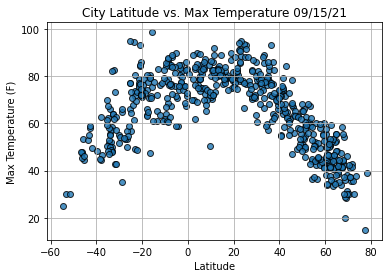

In [11]:
#create a scatter plot 
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

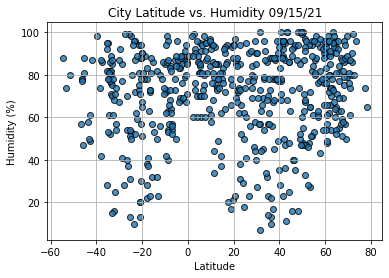

In [12]:
#plot lat vs humidity 
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

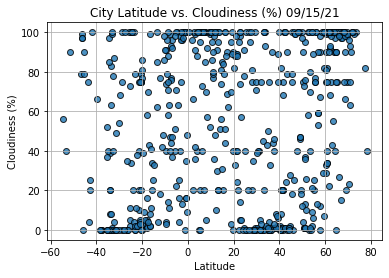

In [13]:
#plot lat vs cloudiness 
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

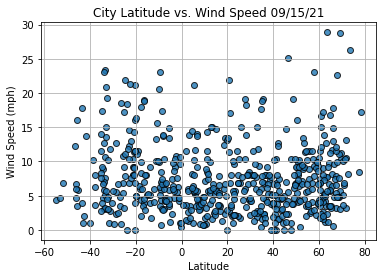

In [14]:
#plot lat vs wind speed 
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
#use linear regression to find the relationship bt variables 
#determine the correlations between weather data and latitude 
# add a regression line equation and correlation coefficient to each scatter plot 

# create the hemisphere df 
# need to perform regression analysis on the max temperatures in the northern and southern hemisphere 
# create a northern hemisphere df from the city_data_df 

# to create the df from a current df we can use the loc () 
# loc() will acces a group of rows and columns in the current df by an index, lavels, or boolean array 
# syntax is row = df. loc [row_index]

index13 = city_data_df.loc[13]
index13 


City                                   Olafsvik
Lat                                     64.8945
Lng                                    -23.7142
Max Temp                                  52.68
Humidity                                     93
Cloudiness                                  100
Wind Speed                                16.82
Country                                      IS
Current Weather                 overcast clouds
Rain inches (last 3 hrs)                      0
Snow inches (last 3 hrs)                      0
Date                        2021-09-16 04:19:48
Name: 13, dtype: object

In [20]:
# we can also filter a df based on a value of a row 
# if you want to get the northern hemi latitudes, for lat greater >= 0 then we can filter 
# city_data_df["Lat"] >= 0 execute this as T or F for all the rows that meet this criteria 

city_data_df.loc[(city_data_df["Lat"] >= 0 )].head()


    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Weather,Rain inches (last 3 hrs),Snow inches (last 3 hrs),Date
1,Albany,42.6001,-73.9662,65.08,95,100,1.66,US,moderate rain,0,0,2021-09-16 04:19:43
4,Butaritari,3.0707,172.7902,83.07,73,99,13.89,KI,overcast clouds,0,0,2021-09-16 04:19:45
5,Cayenne,4.9333,-52.3333,83.08,81,0,1.01,GF,clear sky,0,0,2021-09-16 04:19:45
9,Bosaso,11.2842,49.1816,91.98,44,36,14.34,SO,scattered clouds,0,0,2021-09-16 04:19:47
10,Celestun,20.8667,-90.4000,80.33,85,89,11.39,MX,overcast clouds,0,0,2021-09-16 04:19:47


In [30]:
# assign north and south hem variables 
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0 )] 
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0 )]


In [31]:
# need to def the function for plot_linear_regression 
def plot_linear_regression (x_values, y_values, title, y_label, text_coordinates): 
    #run regression on hemisphere weather data 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values) 
    
    #calculate the regression line y values from the slope and intercept 
    regress_values = x_values * slope + intercept 
    #get the eq of the line 
    line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2)) 
    #create a scatter plot and plot the regression line 
    plt.scatter(x_values, y_values) 
    plt.plot(x_values, regress_values, "r") 
    #annotate the text for the line equation 
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red") 
    plt.title(title) 
    plt.xlabel('Latitude') 
    plt.ylabel(y_label) 
    plt.show() 

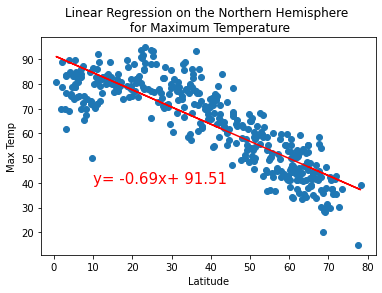

In [32]:
#perform linear regression on the max temp for the north hemi 
# x values = lat column 
# y values = max temp column in the north hemi df 

x_values = northern_hemi_df["Lat"] 
y_values = northern_hemi_df["Max Temp"] 

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

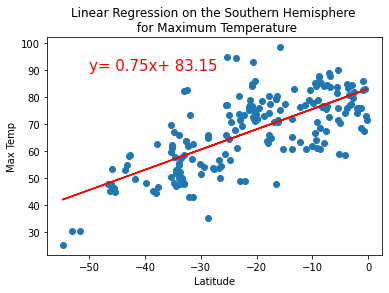

In [34]:
# create the scatter plot for the south hemis 

x_values = southern_hemi_df["Lat"] 
y_values = southern_hemi_df["Max Temp"] 

plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

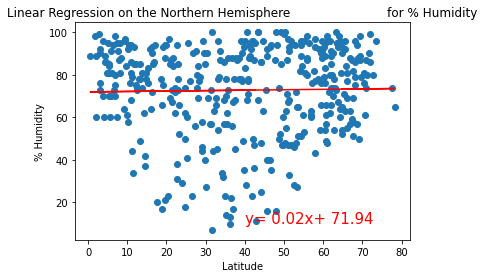

In [35]:
#find the correlation bt lat and %humidity 
#create a linear equation and scatter plot of the lat and %humidity 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

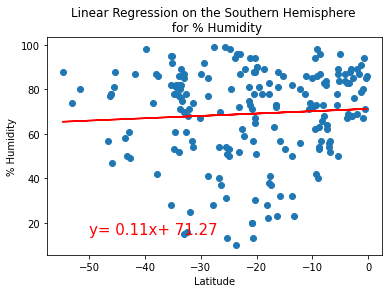

In [41]:
#linear regression on the %humidity for the south hem 


# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

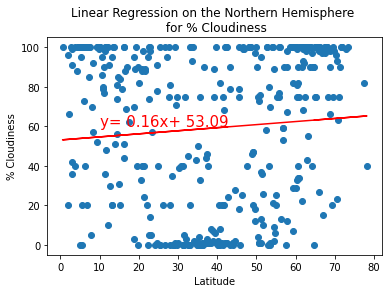

In [43]:
#find the correlation bt latitude and % cloudiness 
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))

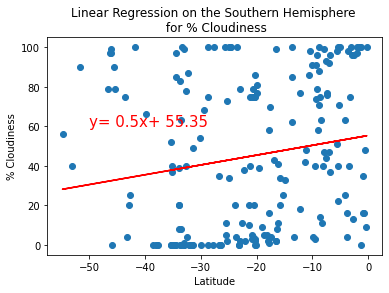

In [45]:
# perform the linear regression on the % cloudiness for the southern hem 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

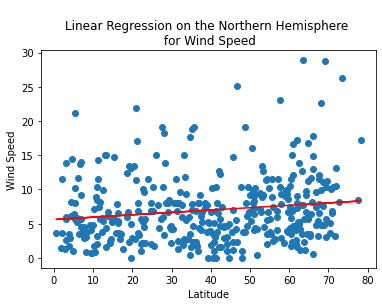

In [47]:
#find the correlation bt lat and wind speed 
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

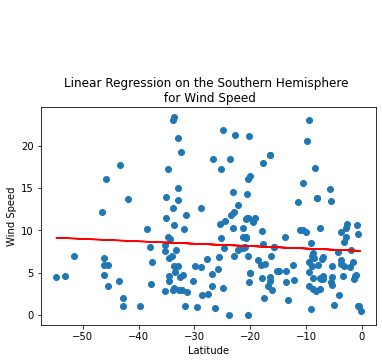

In [48]:
#southern hem wind speed 
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))